# Importing necessary libraries and functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm

# Loading dataset
it take some time to load because of the large size of the dataset (on my machine it took about 6 minutes)

In [3]:
path_to_dataset = r'G:\dataset\turknetchurnekimanonim.xlsx'
complete_dataset = pd.read_excel(path_to_dataset, engine='openpyxl')

# Information about dataset used
showing some information about the dataset used

In [4]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192294 entries, 0 to 192293
Columns: 125 entries, Unnamed: 0 to CHURNTEST_DATE
dtypes: datetime64[ns](2), float64(19), int64(95), object(9)
memory usage: 183.4+ MB


In [5]:
# making copy of the dataset and work on it instead of working on the original dataset
# because loading the dataset everytime we try new thing ore new model is taking a long time
dataset = complete_dataset.copy()

In [6]:
#showing the firat 5 rows of the data
dataset.head()

,Unnamed: 0,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,...,DENVERGIRISTARIHI_3,DENVERCIKISTARIHI_3,DENVERKALDIGISURE_GUN_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3,CHURNTEST_DATE
0,0,212.0,İstanbul (Avrupa),939.0,SULTANGAZİ,E,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,10,87108,0,16.5013,272.1967,2020-10-31
1,1,212.0,İstanbul (Avrupa),420.0,SARIYER,K,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,1,90271,0,135.8656,185.5825,2020-10-31
2,2,262.0,Kocaeli,998.0,İZMİT,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,3,90112,0,1.8255,46.6458,2020-10-31
3,3,212.0,İstanbul (Avrupa),418.0,KÜÇÜKÇEKMECE,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,15,87588,1664,2.0288,42.0181,2020-10-31
4,4,212.0,İstanbul (Avrupa),425.0,BAYRAMPAŞA,E,A,2016-04-21,2020-10-02,54,...,NaN,NaN,0,0,0,0,0,0.0000,0.0000,2020-10-31


In [7]:
# droping the unnecessary column 'Unnamed: 0'
dataset = dataset.drop(columns=['Unnamed: 0'])

In [8]:
#drop rows that does not have values in 'DURUM' column
dataset = dataset.dropna(subset = ['DURUM'])

In [9]:
# checking the number of the rows with empty value of 'ILADI' column 
dataset['ILADI'].isnull().sum()

5842

In [10]:
#filling the empty values of column 'ILADI' with 'city'
dataset['ILADI'] = dataset['ILADI'].fillna('city')

# Balancing the number of K's and A's in 'DURUM' column

In [11]:
#the original count of K's and A's
Counter(dataset['DURUM'])

Counter({'A': 180341, 'K': 11953})

# Deleting some data  
we traied to delete the rows with column 'DURUM' value's 'A' to get balanced K and A's randomly and we tried to take only first 20000 rows of 'A' valued and also we tried to take the last 20000 rows but the best results was with the first 20000 rows

In [12]:
index = dataset[dataset['DURUM'] == 'A'].index[20000:]
#index = random.sample(list(index),160000)
print(len(index))
dataset.drop(index , inplace=True)


160341


In [13]:
# K and A's number after removing some rows
Counter(dataset['DURUM'])

Counter({'A': 20000, 'K': 11953})

# Encoding the dataset

In [14]:

label_encoder = LabelEncoder()
#label encoding the data
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset

,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,ODEMESEKLI,...,DENVERGIRISTARIHI_3,DENVERCIKISTARIHI_3,DENVERKALDIGISURE_GUN_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3,CHURNTEST_DATE
0,0,79,714,524,0,0,19,19549,51,1,...,0,0,0,0,10,3184,0,17122,18431,0
1,0,79,309,496,1,0,19,5620,51,1,...,0,0,0,0,1,5155,0,26385,14145,0
2,14,43,763,688,0,0,20,5621,51,1,...,0,0,0,0,3,4996,0,1651,3414,0
3,0,79,307,387,0,0,20,5622,51,0,...,0,0,0,0,15,3469,1044,1884,3028,0
4,0,79,314,86,0,0,20,26,51,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,68,30,247,123,0,1,1532,44,0,0,...,0,0,0,0,2,6842,0,7376,8959,0
192248,27,52,292,541,0,1,1532,32,0,0,...,0,0,0,0,0,0,0,0,0,0
192270,0,79,713,90,0,1,1532,42,0,0,...,0,0,0,0,4,45,282,180,183,0
192282,1,78,312,666,0,1,1532,57,0,1,...,0,0,0,0,0,2543,0,1901,1553,0


# feature selection
we use a feature selection algorithm in order to delete the columns 
which do not have an effect on the column we looking for.

In [15]:
#feature selection
train_columns = list(set(list(dataset)) - set(['DURUM']))
looked_column = list(set(['DURUM']))
#adding constant column of ones, mandatory for sm.OLS model


X = dataset[train_columns].T.drop_duplicates().T
y = dataset[looked_column]

cols = list(X.columns)
pmax = 1

while len(cols) > 0:
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    
    p = pd.Series(model.pvalues.values[1:], index =cols)
    pmax = max(p)
    feature_with_pmax = p.idxmax()
    if pmax>0.05:
        cols.remove(feature_with_pmax)
    else:
        break
        
selected_features = cols
print(selected_features)
len(selected_features)
    

['RISKLIMUSTERI', 'ILCE', 'IKNATICKET_3', 'ARKADASINIGETIR', 'FATURA_GECIKME_UCRETI_2', 'TDU_TICKETSL_3', 'ARKADASINIGETIRILEGELENLER', 'MAX_SESSIONTIME_3', 'ACIKLAMA', 'TOTALDOWNLOADGB_1', 'TOTALDOWNLOADGB_3', 'ADSLARIZA_TICKETSL_3', 'ADSLARIZA_TICKETKAPANMASURESI_3', 'MIN_SESSIONTIME_1', 'ILTELKODU', 'KAPASITE', 'CM_DESTEKSAYISI_1', 'CM_DESTEKSAYISI_2', 'OIMSIKAYET_DESTEKSAYISI_2', 'FATURAGONDERIMTIPI', 'ADSLARIZA_TICKETSL_1', 'TOTALDOWNLOADGB_2', 'PORTERROR_SAYISI_2', 'CAGRIMERKEZIARAMASAYISI_2', 'OIMSIKAYET_DESTEKSAYISI_1', 'ODEMESEKLI', 'TDU_DESTEKSAYISI_3', 'TDU_DESTEKSAYISI_1', 'DESTEKSAYISI_2', 'ADSLARIZA_TICKETKAPANMASURESI_2', 'CINSIYET', 'TDU_TICKETKAPANMASURESI_3', 'DESTEKSAYISI_1', 'CLOSE_DATE', 'MAX_SESSIONTIME_1', 'DESTEKSAYISI_3', 'MIN_SESSIONTIME_3', 'POSILCE', 'TOTALUPLOADGB_3', 'KALDIGI_AY_SAYISI', 'ILADI', 'FATURA_GECIKME_1', 'YAPA_VAE', 'FATURA_GECIKME_3', 'currentDown']


45

In [16]:
#dataset with only the feature columns we need
new_dataset = dataset[selected_features]
new_dataset

,RISKLIMUSTERI,ILCE,IKNATICKET_3,ARKADASINIGETIR,FATURA_GECIKME_UCRETI_2,TDU_TICKETSL_3,ARKADASINIGETIRILEGELENLER,MAX_SESSIONTIME_3,ACIKLAMA,TOTALDOWNLOADGB_1,...,DESTEKSAYISI_3,MIN_SESSIONTIME_3,POSILCE,TOTALUPLOADGB_3,KALDIGI_AY_SAYISI,ILADI,FATURA_GECIKME_1,YAPA_VAE,FATURA_GECIKME_3,currentDown
0,0,524,0,74,0,0,0,3184,7,12370,...,0,0,714,17122,51,79,0,1,0,1118
1,0,496,0,74,0,0,0,5155,0,20349,...,0,0,309,26385,51,79,0,0,0,8456
2,0,688,0,74,0,0,0,4996,3,3595,...,0,0,763,1651,51,43,0,0,0,3960
3,0,387,0,2,0,0,0,3469,4,4315,...,0,1044,307,1884,51,79,0,0,0,5907
4,0,86,0,3,0,0,0,0,7,0,...,6,0,314,0,51,79,0,1,0,1756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,0,123,0,74,0,0,0,6842,10,15243,...,14,0,247,7376,0,30,0,0,0,1347
192248,0,541,0,74,0,0,1,0,9,0,...,24,0,292,0,0,52,0,0,0,0
192270,0,90,0,74,0,1,0,45,7,0,...,17,282,713,180,0,79,0,1,0,8456
192282,0,666,0,74,0,0,0,2543,10,21286,...,10,0,312,1901,0,78,0,0,0,5908


In [17]:
max(y['DURUM'])

1

In [18]:
x = new_dataset.iloc[:,:]
y = y.iloc[:,:]
x,y

(        RISKLIMUSTERI  ILCE  IKNATICKET_3  ARKADASINIGETIR  \
 0                   0   524             0               74   
 1                   0   496             0               74   
 2                   0   688             0               74   
 3                   0   387             0                2   
 4                   0    86             0                3   
 ...               ...   ...           ...              ...   
 192234              0   123             0               74   
 192248              0   541             0               74   
 192270              0    90             0               74   
 192282              0   666             0               74   
 192287              0   200             0               74   
 
         FATURA_GECIKME_UCRETI_2  TDU_TICKETSL_3  ARKADASINIGETIRILEGELENLER  \
 0                             0               0                           0   
 1                             0               0                           0   
 2

# Splitting the data into train and test sets
here we choose to use 90% of the data to train our model and 10% for testing.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state = 0)

# Random Forest Classifier
The first classifier we decided to use was the famous random forest classifier. In order to get the best accuracy possible from this model we tried different numbers of trees in the forest then we visualized the results and according to the generated graph we choose the correct tree number.

(if you want to uncomment the cell sellect all lines and press Ctrl + /)

In [20]:
# random_forest_acc=[]
# for nt in range(100,300,5):
#     clf =  RandomForestClassifier(n_estimators = nt)
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     random_forest_acc.append(clf.score(x_test, y_test))


c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A co

<IPython.core.display.Javascript object>


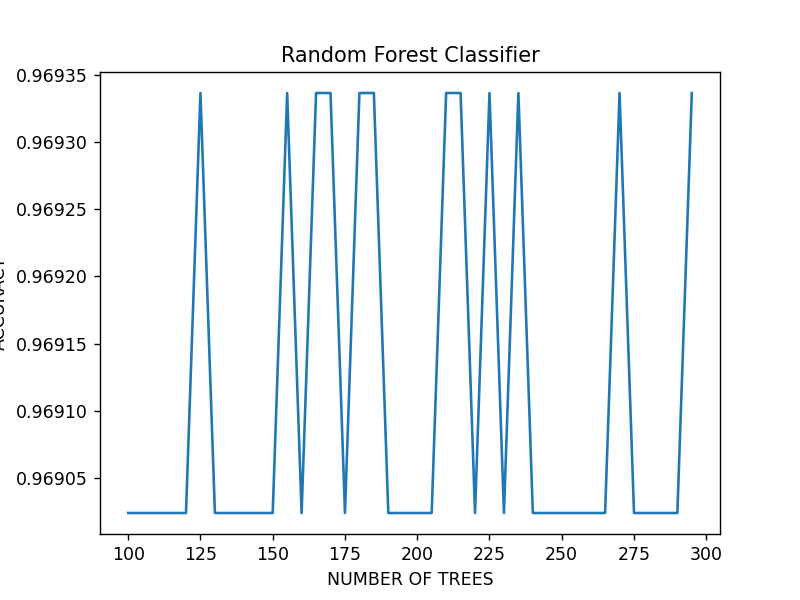

In [37]:
#visualizing the accuracy of the model against the number of trees in the forest
# %matplotlib notebook
# plt.plot(range(100,300,5), random_forest_acc)
# plt.title('Random Forest Classifier')
# plt.xlabel('NUMBER OF TREES')
# plt.ylabel('ACCURACY')
# plt.show()

In [38]:
#we choose number_of_trees = 125 accourding to the graph
# classifier =  RandomForestClassifier(n_estimators = 125)
# classifier.fit(x_train, y_train)
# y_pred = classifier.predict(x_test)
# classifier.score(x_test, y_test)

c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9690237797246558

In [39]:
# f1 score of the model
# f1 = f1_score(y_test, y_pred)
# f1

0.9573826947912182

In [40]:
#confusion matrix of the model
# cm = confusion_matrix(y_test, y_pred)
# cm

array([[1985,   59],
       [  40, 1112]], dtype=int64)

<IPython.core.display.Javascript object>


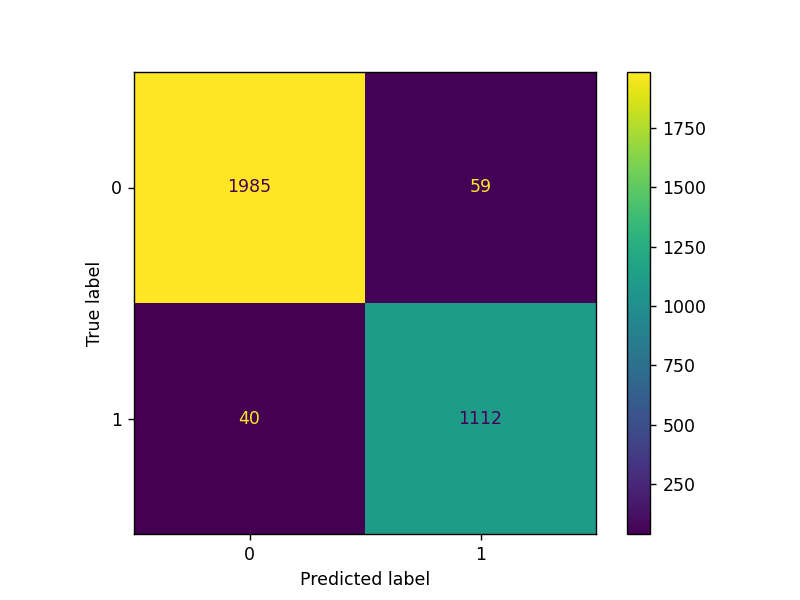

In [41]:
#ploting the confusion matrix 
# plot_confusion_matrix(classifier, x_test, y_test) 

# K Nearest Neighbors Classifier
The second classifier we tried was KNN classifier. Again in order to decide the best number of neighbors we should use, we tried different numbers of neighbors and visualized the accuracy against the number of neighbors.

(if you want to uncomment the cell sellect all lines and press Ctrl + /)

In [26]:
# #KNN classifier
# knn_acc = []
# for n in range(2,41):
#     clf = KNeighborsClassifier(n_neighbors=n)
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     knn_acc.append(clf.score(x_test, y_test))

c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: Data

<IPython.core.display.Javascript object>


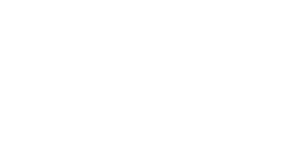

In [27]:
# #visualizing the accuracy of the model against the number of Neighbors
# %matplotlib notebook
# plt.plot(range(2,41), knn_acc)
# plt.title('K Nearest Neighbors Classifier ')
# plt.xlabel('NUMBER OF NEIGHBORS')
# plt.ylabel('ACCURACY')
# plt.show()

In [42]:
# #we choose number of neighbors = 12 accourding to the graph
# clf = KNeighborsClassifier(n_neighbors=12)
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# clf.score(x_test, y_test)

c:\users\yasse\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9264705882352942

In [43]:
# # f1 score of the model
# f1 = f1_score(y_test, y_pred)
# f1

0.9038854805725972

In [44]:
# #confusion matrix of the model
# cm = confusion_matrix(y_test, y_pred)
# cm

array([[1856,  188],
       [  47, 1105]], dtype=int64)

<IPython.core.display.Javascript object>


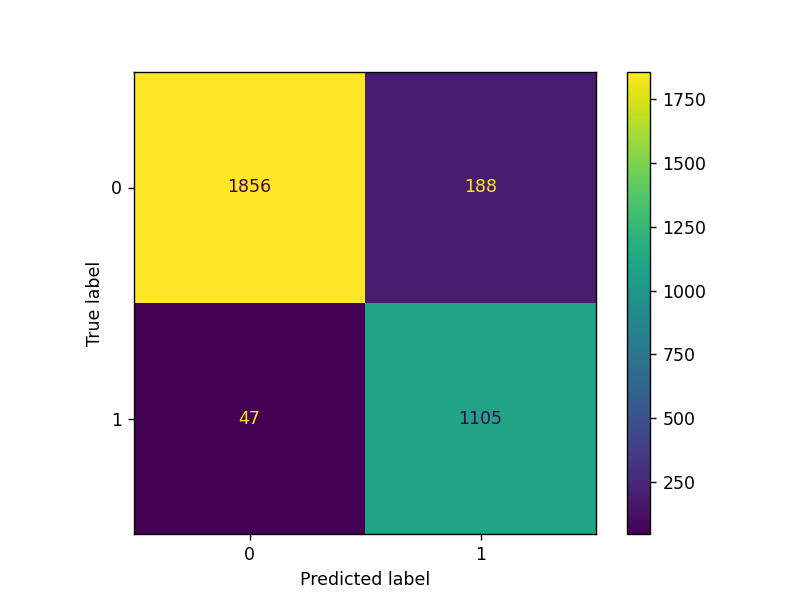

In [45]:
# #ploting the confusion matrix 
# plot_confusion_matrix(clf, x_test, y_test)

# Decision Tree Classifier
The third and final model that we tried was the Decision Tree Classifier. As we did before with previous models, we tried different max_depth values in order to get the best out of the model.

In [32]:
# Decision Tree Classifier
decision_tree_acc = []
for n in range(1,20):
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    decision_tree_acc.append(clf.score(x_test, y_test))

<IPython.core.display.Javascript object>


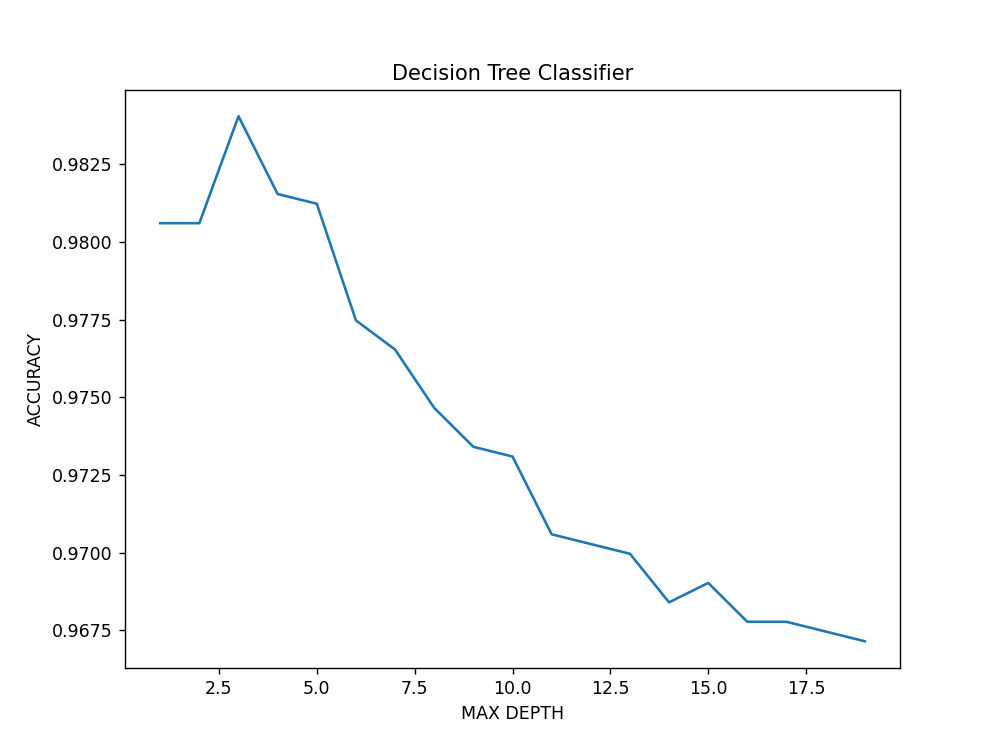

In [33]:
#visualizing the accuracy of the model against the max depth values
%matplotlib notebook
plt.plot(range(1,20), decision_tree_acc)
plt.title('Decision Tree Classifier')
plt.xlabel('MAX DEPTH')
plt.ylabel('ACCURACY')
plt.show()

In [34]:
# according to the graph we obtained we decide to choose max_depth = 3.
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(clf.score(x_test, y_test))
#confusion matrix of the model
cm = confusion_matrix(y_test,y_pred)
cm


0.9840425531914894


array([[2031,   13],
       [  38, 1114]], dtype=int64)

In [35]:
#f1 score of the model
f1 = f1_score(y_test, y_pred)
f1

0.9776217639315489

<IPython.core.display.Javascript object>


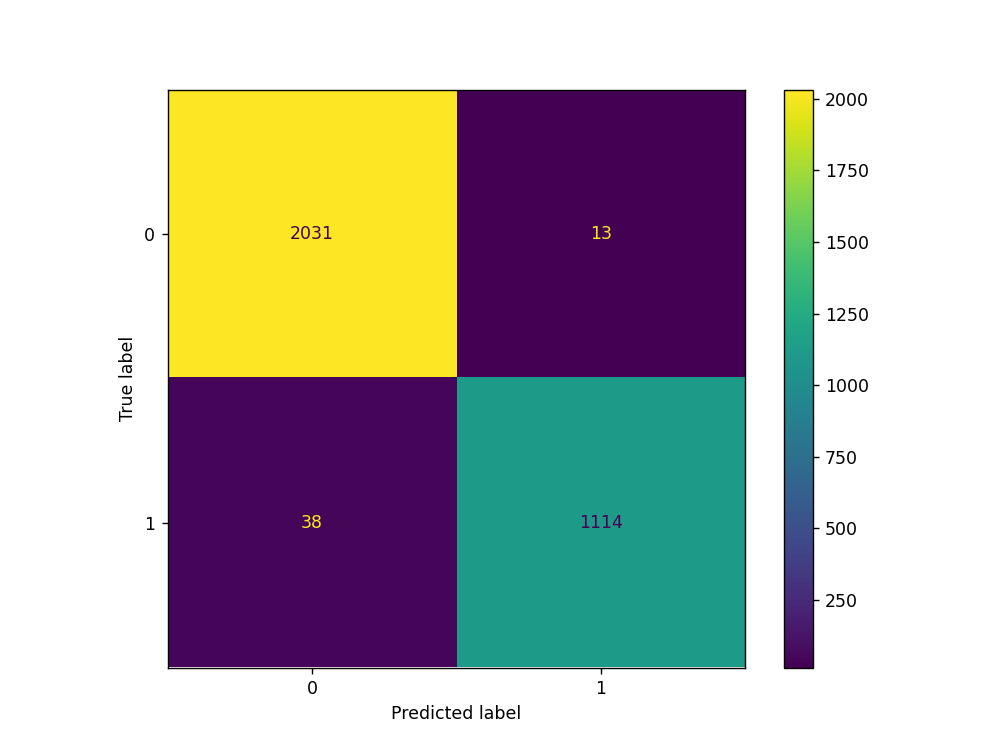

In [36]:
#ploting the confusion matri
plot_confusion_matrix(clf, x_test, y_test)

# Conclusion
In conclusion, and for this specific problem we decided to use a decision tree classifier because it provided us with the best accuracy and best confusion matrix.